<a href="https://colab.research.google.com/github/MittalNeha/Mask_RCNN/blob/master/Mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!git clone https://github.com/akTwelve/Mask_RCNN.git

In [4]:
! git clone https://github.com/MittalNeha/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 1020 (delta 18), reused 35 (delta 15), pack-reused 978
Receiving objects: 100% (1020/1020), 137.89 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [5]:
%cd Mask_RCNN/
!pip install -r requirements.txt

/content/Mask_RCNN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 27.8 MB/s 
     |████████████████████████████████| 298 kB 71.9 MB/s 
     |████████████████████████████████| 120 kB 73.8 MB/s 
     |████████████████████████████████| 154 kB 74.4 MB/s 
     |████████████████████████████████| 82 kB 1.1 MB/s 


In [6]:
%cd /content/Mask_RCNN/mrcnn
from m_rcnn import *
%matplotlib inline

/content/Mask_RCNN/mrcnn
VERS 0.2


In [15]:
#Loading dataset
!wget http://convo-care.com/data.zip
!unzip data.zip

# Extract Images
images_path = "data/images.zip"
annotations_path = "data/train.json"
annotations_val_path = "data/val.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 406 images


In [16]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_val_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/data/train.json
Annotation json path:  /content/data/val.json
Train: 248
Validation: 14
Classes: 2


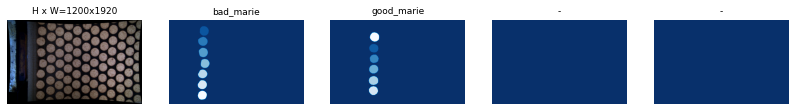

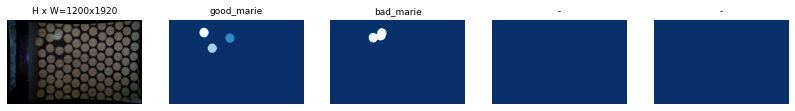

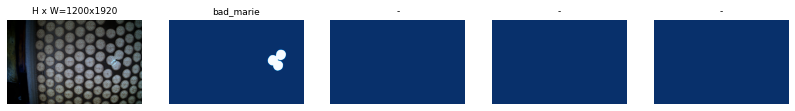

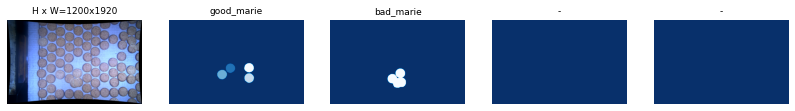

In [17]:
# Load image samples
display_image_samples(dataset_train)

3. Training
Train Mask RCNN on your custom Dataset.

In [18]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

/content/drive/MyDrive/Mask_rcnn/logs/mask_rcnn_coco.h5


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/Mask_rcnn/logs

In [19]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config,6)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Mask_rcnn/logs/object20221014T0516/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask

In [ ]:
train_head(model, dataset_train, dataset_train, config,20)


Starting at epoch 6. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Mask_rcnn/logs/object20221014T0516/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask

In [ ]:
# train_head(model, dataset_train, dataset_train, config,20)

In [20]:
# train_head(model, dataset_train, dataset_train, config,40)

4. Detection (test your model on a random image)

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
# Load Image
from visualize import random_colors, get_mask_contours, draw_mask
img = cv2.imread("/content/scd.jpeg")

test_model, inference_config = load_inference_model(1, "/content/drive/MyDrive/Mask_rcnn/logs/object20220707T1548/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

In [ ]:
cv2_imshow(img)